In [58]:
import pandas as pd
data_df = pd.read_csv('c:/py_data/도라에몽 영화 평점,리뷰 크롤링.csv', 
                 encoding='cp949')
del data_df['Unnamed: 0']

In [59]:
data_df.head()

,ID,평점,리뷰
0,17536955,5,어린이용 테넷인줄 생각보다 스토리가 던져둔 떡밥회수를 잘합니다 근데 감동 포인트가 ...
1,17536336,10,진구의 현재와 과거의 접점을 정확하게 이어주면서 재미를 주고 할머니를 등장시킨것도 ...
2,17535872,10,내가 어릴 적 좋아했던 도라에몽어른이 되어서도 감동있고 재밌네요
3,17535146,7,성장은 언제나 아픈 법
4,17534975,10,너무너무 재밌고 감동이네요 저도 어린시절에 뛰어놀던 그시절로 돌아 가보고싶어요 엄마...


In [60]:
data_df.loc[data_df['리뷰'].isnull()]

,ID,평점,리뷰
66,17524296,1,NaN
110,17521217,10,NaN
112,17520927,10,NaN
152,17518728,10,NaN


In [61]:
data_df = data_df.dropna()   # Null 값이 존재하는 모든 행 제거

In [62]:
data_df.isnull().sum()

ID    0
평점    0
리뷰    0
dtype: int64

In [63]:
data_df.loc[data_df['리뷰'].isnull()]

,ID,평점,리뷰


In [64]:
from ckonlpy.tag import Twitter

Twitter = Twitter()

Twitter.add_dictionary('스탠바이미','Noun')
Twitter.add_dictionary('스탠 바이','Noun')
Twitter.add_dictionary('스탠바이','Noun')

C:\Users\CPB06GameN\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [65]:
nouns_lst = []
for i in data_df['리뷰']:
    nouns = Twitter.nouns(i)
    nouns_lst.append(nouns)
nouns_lst

[['어린이',
  '용',
  '테넷인줄',
  '생각',
  '스토리',
  '떡밥',
  '회수',
  '감동',
  '포인트',
  '압축',
  '어서',
  '어서',
  '거기',
  '잠깐',
  '집중',
  '훅',
  '지나',
  '빌드업',
  '갑작',
  '탓',
  '문득',
  '생각',
  '건',
  '애',
  '진구',
  '진구',
  '의식',
  '때',
  '추억',
  '회상',
  '장면',
  '내',
  '장면',
  '다른',
  '도라에몽',
  '명장',
  '로',
  '재',
  '구성',
  '거나',
  '만화',
  '느낌',
  '애니메이션',
  '이건',
  '만화책',
  '이건',
  '그대로',
  '보',
  '여준',
  '올드',
  '세대',
  '거기',
  '뭔가',
  '감동',
  '수',
  '래서',
  '할머니',
  '저',
  '의지',
  '약',
  '머리',
  '진정',
  '그게',
  '어요'],
 ['진구', '현재', '과거', '접점', '정확', '면서', '재미', '할머니', '등장', '어요'],
 ['내', '적', '도라에몽', '어른', '어서', '감동'],
 ['성장', '언제', '법'],
 ['감동', '요', '저', '어린시절', '그', '시절', '가보', '어요', '엄마', '보고', '어요', '꼭', '한번'],
 ['생각', '감동', '어른'],
 ['평소',
  '도라에몽',
  '아하',
  '진',
  '아보',
  '지도',
  '우연',
  '이',
  '영화',
  '극장',
  '정말',
  '후회',
  '덕분',
  '편도',
  '볼',
  '려고'],
 ['역시',
  '도라에몽',
  '스탠바이미',
  '과거',
  '미래',
  '도라에몽',
  '약간',
  '감동',
  '눈물샘',
  '자극',
  '것',
  '편',
  '편',
  '약간',
  '어요',
  '역시',
  

In [66]:
data_df['명사 리뷰'] = nouns_lst
data_df.head()

,ID,평점,리뷰,명사 리뷰
0,17536955,5,어린이용 테넷인줄 생각보다 스토리가 던져둔 떡밥회수를 잘합니다 근데 감동 포인트가 ...,"[어린이, 용, 테넷인줄, 생각, 스토리, 떡밥, 회수, 감동, 포인트, 압축, 어..."
1,17536336,10,진구의 현재와 과거의 접점을 정확하게 이어주면서 재미를 주고 할머니를 등장시킨것도 ...,"[진구, 현재, 과거, 접점, 정확, 면서, 재미, 할머니, 등장, 어요]"
2,17535872,10,내가 어릴 적 좋아했던 도라에몽어른이 되어서도 감동있고 재밌네요,"[내, 적, 도라에몽, 어른, 어서, 감동]"
3,17535146,7,성장은 언제나 아픈 법,"[성장, 언제, 법]"
4,17534975,10,너무너무 재밌고 감동이네요 저도 어린시절에 뛰어놀던 그시절로 돌아 가보고싶어요 엄마...,"[감동, 요, 저, 어린시절, 그, 시절, 가보, 어요, 엄마, 보고, 어요, 꼭,..."


In [67]:
stop_word_df = pd.read_csv('c:/py_data/korean_stopword.csv', encoding='utf-8')
stop_word_df

,불용어
0,이
1,있
2,하
3,것
4,들
...,...
134,루
135,요
136,로
137,와


In [68]:
stop_word = list(stop_word_df['불용어'])+['어요','엇','분']
stop_word

['이',
 '있',
 '하',
 '것',
 '들',
 '그',
 '되',
 '수',
 '이',
 '보',
 '않',
 '없',
 '나',
 '사람',
 '주',
 '아니',
 '등',
 '같',
 '우리',
 '때',
 '년',
 '가',
 '한',
 '지',
 '대하',
 '오',
 '말',
 '일',
 '그렇',
 '위하',
 '때문',
 '그것',
 '두',
 '말하',
 '알',
 '그러나',
 '받',
 '못하',
 '일',
 '그런',
 '또',
 '문제',
 '더',
 '사회',
 '많',
 '그리고',
 '좋',
 '크',
 '따르',
 '중',
 '나오',
 '가지',
 '씨',
 '시키',
 '만들',
 '지금',
 '생각하',
 '그러',
 '속',
 '하나',
 '집',
 '살',
 '모르',
 '적',
 '월',
 '데',
 '자신',
 '안',
 '어떤',
 '내',
 '내',
 '경우',
 '명',
 '생각',
 '시간',
 '그녀',
 '다시',
 '이런',
 '앞',
 '보이',
 '번',
 '나',
 '다른',
 '어떻',
 '여자',
 '개',
 '전',
 '들',
 '사실',
 '이렇',
 '점',
 '싶',
 '말',
 '정도',
 '좀',
 '원',
 '잘',
 '통하',
 '소리',
 '놓',
 '요',
 '곳',
 '어서',
 '제',
 '려고',
 '어요',
 '다가',
 '습',
 '저',
 '후',
 '이나',
 '까지',
 '고',
 '조',
 '거',
 '시',
 '길이',
 '던',
 '도',
 '면',
 '단',
 '용',
 '해',
 '녕',
 '리',
 '등등',
 '권',
 '고',
 '초',
 '합',
 '잡',
 '비',
 '막',
 '리가',
 '루',
 '요',
 '로',
 '와',
 '리',
 '어요',
 '엇',
 '분']

In [69]:
result = []
for nouns in data_df['명사 리뷰']:
    contents = []
    for w in nouns:
        if w not in stop_word:
            contents.append(w)
    result.append(list(set(contents)))
result

[['테넷인줄',
  '거나',
  '스토리',
  '머리',
  '집중',
  '진구',
  '할머니',
  '거기',
  '문득',
  '그대로',
  '감동',
  '추억',
  '포인트',
  '느낌',
  '애니메이션',
  '이건',
  '회수',
  '의지',
  '구성',
  '회상',
  '뭔가',
  '떡밥',
  '어린이',
  '의식',
  '올드',
  '약',
  '진정',
  '그게',
  '재',
  '만화책',
  '세대',
  '장면',
  '래서',
  '잠깐',
  '도라에몽',
  '압축',
  '여준',
  '갑작',
  '탓',
  '빌드업',
  '애',
  '만화',
  '훅',
  '건',
  '지나',
  '명장'],
 ['정확', '재미', '면서', '현재', '진구', '할머니', '접점', '등장', '과거'],
 ['감동', '도라에몽', '어른'],
 ['성장', '언제', '법'],
 ['가보', '꼭', '감동', '어린시절', '보고', '엄마', '시절', '한번'],
 ['감동', '어른'],
 ['도라에몽',
  '평소',
  '우연',
  '지도',
  '덕분',
  '후회',
  '정말',
  '아하',
  '진',
  '극장',
  '볼',
  '편도',
  '아보',
  '영화'],
 ['눈물샘', '도라에몽', '역시', '감동', '미래', '약간', '실망', '스탠바이미', '자극', '편', '과거'],
 ['재밌슴돠', '세기', '역시', '점점'],
 ['최고', '영화', '인생'],
 ['울보', '여전', '놈', '진구'],
 ['재미', '내용'],
 ['애', '초등학생', '기도'],
 ['도라에몽',
  '인지',
  '최근',
  '미래',
  '시리즈',
  '면서',
  '딸도',
  '아하',
  '글구',
  '티비',
  '시대',
  '완전',
  '영화',
  '계속'],
 ['조심', '진짜', '감수성', '충만'],
 ['이유', '기억

In [70]:
from apyori import apriori
results = list(apriori(result,
             min_support=0.07,    # 지지도
             min_confidence=0.07, # 신뢰도
             min_lift=1.0,       # 향상도
             max_length=2))      # 크기가 2인 규칙
results

[RelationRecord(items=frozenset({'감동'}), support=0.3088235294117647, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'감동'}), confidence=0.3088235294117647, lift=1.0)]),
 RelationRecord(items=frozenset({'눈물'}), support=0.08823529411764706, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'눈물'}), confidence=0.08823529411764706, lift=1.0)]),
 RelationRecord(items=frozenset({'도라에몽'}), support=0.24509803921568626, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'도라에몽'}), confidence=0.24509803921568626, lift=1.0)]),
 RelationRecord(items=frozenset({'보고'}), support=0.10294117647058823, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'보고'}), confidence=0.10294117647058823, lift=1.0)]),
 RelationRecord(items=frozenset({'스탠바이미'}), support=0.09313725490196079, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'스탠바이미'}), confidence=0

In [71]:
import pandas as pd
# 데이터 프레임 형태로 정리합니다.
columns = ['source','target','support']
network_df = pd.DataFrame(columns=columns)
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]   #
        row = [items[0],items[1],result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)
network_df

,source,target,support
0,감동,도라에몽,0.093137
1,감동,영화,0.078431
2,감동,재미,0.078431


In [72]:
# 키워드 등장빈도 계산
from collections import Counter
text_join = ''
for i in data_df['명사 리뷰']:
    for j in i:
        text_join = text_join + ' ' + j

In [73]:
nouns = Twitter.nouns(text_join)
nouns

['어린이',
 '용',
 '테넷인줄',
 '생각',
 '스토리',
 '떡밥',
 '회수',
 '감동',
 '포인트',
 '압축',
 '어서',
 '어서',
 '거기',
 '잠깐',
 '집중',
 '훅',
 '지나',
 '빌드업',
 '갑작',
 '탓',
 '문득',
 '생각',
 '건',
 '애',
 '진구',
 '진구',
 '의식',
 '때',
 '추억',
 '회상',
 '장면',
 '내',
 '장면',
 '다른',
 '도라에몽',
 '명장',
 '로',
 '재',
 '구성',
 '거나',
 '만화',
 '느낌',
 '애니메이션',
 '이건',
 '만화책',
 '이건',
 '그대로',
 '보',
 '여준',
 '올드',
 '세대',
 '거기',
 '뭔가',
 '감동',
 '수',
 '래서',
 '할머니',
 '저',
 '의지',
 '약',
 '머리',
 '진정',
 '그게',
 '어요',
 '진구',
 '현재',
 '과거',
 '접점',
 '정확',
 '면서',
 '재미',
 '할머니',
 '등장',
 '어요',
 '내',
 '적',
 '도라에몽',
 '어른',
 '어서',
 '감동',
 '성장',
 '언제',
 '법',
 '감동',
 '요',
 '저',
 '어린시절',
 '그',
 '시절',
 '가보',
 '어요',
 '엄마',
 '보고',
 '어요',
 '꼭',
 '한번',
 '생각',
 '감동',
 '어른',
 '평소',
 '도라에몽',
 '아하',
 '진',
 '아보',
 '지도',
 '우연',
 '이',
 '영화',
 '극장',
 '정말',
 '후회',
 '덕분',
 '편도',
 '볼',
 '려고',
 '역시',
 '도라에몽',
 '스탠바이미',
 '과거',
 '미래',
 '도라에몽',
 '약간',
 '감동',
 '눈물샘',
 '자극',
 '것',
 '편',
 '편',
 '약간',
 '어요',
 '역시',
 '실망',
 '역시',
 '재밌슴돠',
 '점점',
 '세기',
 '다가',
 '고',
 '사실',
 '내',
 '인생',
 '최고',
 '영

In [74]:
network_df

,source,target,support
0,감동,도라에몽,0.093137
1,감동,영화,0.078431
2,감동,재미,0.078431


In [79]:
count = Counter(nouns)
count

Counter({'어린이': 2,
         '용': 3,
         '테넷인줄': 1,
         '생각': 13,
         '스토리': 17,
         '떡밥': 2,
         '회수': 2,
         '감동': 68,
         '포인트': 5,
         '압축': 1,
         '어서': 15,
         '거기': 2,
         '잠깐': 3,
         '집중': 2,
         '훅': 1,
         '지나': 1,
         '빌드업': 1,
         '갑작': 1,
         '탓': 1,
         '문득': 1,
         '건': 2,
         '애': 5,
         '진구': 27,
         '의식': 1,
         '때': 16,
         '추억': 5,
         '회상': 1,
         '장면': 8,
         '내': 6,
         '다른': 1,
         '도라에몽': 63,
         '명장': 1,
         '로': 1,
         '재': 1,
         '구성': 1,
         '거나': 1,
         '만화': 3,
         '느낌': 7,
         '애니메이션': 6,
         '이건': 2,
         '만화책': 1,
         '그대로': 3,
         '보': 7,
         '여준': 1,
         '올드': 1,
         '세대': 2,
         '뭔가': 1,
         '수': 8,
         '래서': 1,
         '할머니': 24,
         '저': 7,
         '의지': 1,
         '약': 1,
         '머리': 1,
         '진정': 1,
 

In [84]:
# stopword로 한번더 거르기
stop_word2 = ['어서','때','어요','적','요','꼭','역시','것','더','진짜','까지','거']
temp_dic = []
for i in nouns:
    if i not in stop_word2:
        temp_dic.append(i)
nouns = temp_dic
count = dict(Counter(nouns).most_common())
count

{'감동': 68,
 '도라에몽': 63,
 '영화': 49,
 '재미': 33,
 '진구': 27,
 '스탠바이미': 25,
 '할머니': 24,
 '보고': 22,
 '어른': 20,
 '눈물': 18,
 '스토리': 17,
 '아이': 14,
 '생각': 13,
 '면서': 10,
 '추천': 10,
 '보기': 10,
 '과거': 9,
 '편': 9,
 '내용': 9,
 '우리': 9,
 '부터': 9,
 '마음': 9,
 '장면': 8,
 '수': 8,
 '아하': 8,
 '이': 8,
 '시리즈': 8,
 '도': 8,
 '느낌': 7,
 '보': 7,
 '저': 7,
 '미래': 7,
 '고': 7,
 '분': 7,
 '안': 7,
 '이슬': 7,
 '좀': 7,
 '못': 7,
 '아주': 7,
 '애니': 7,
 '가족': 7,
 '중간': 7,
 '내': 6,
 '애니메이션': 6,
 '현재': 6,
 '정말': 6,
 '볼': 6,
 '전': 6,
 '강추': 6,
 '기': 6,
 '처음': 6,
 '지루': 6,
 '사랑': 6,
 '울': 6,
 '개': 6,
 '마지막': 6,
 '주년': 6,
 '포인트': 5,
 '애': 5,
 '추억': 5,
 '어린시절': 5,
 '한번': 5,
 '인생': 5,
 '다시': 5,
 '완전': 5,
 '기억': 5,
 '노래': 5,
 '보시': 5,
 '공감': 5,
 '노진구': 5,
 '기대': 5,
 '이야기': 5,
 '왜': 5,
 '년': 5,
 '영화관': 5,
 '시간': 5,
 '극장판': 5,
 '중': 5,
 '그': 4,
 '편도': 4,
 '려고': 4,
 '최고': 4,
 '초등학생': 4,
 '친구': 4,
 '걸': 4,
 '초딩': 4,
 '아들': 4,
 '길': 4,
 '인적': 4,
 '전혀': 4,
 '날': 4,
 '살': 4,
 '었습': 4,
 '나이': 4,
 '게': 4,
 '정도': 4,
 '가슴': 4,
 '점': 4,
 '성인': 4,
 

In [85]:
# 10개 미만 버리기
count_len = 10
temp_dic={}
for key, value in count.items():
    if value > count_len:
        temp_dic[key] = value
count = temp_dic
count

{'감동': 68,
 '도라에몽': 63,
 '영화': 49,
 '재미': 33,
 '진구': 27,
 '스탠바이미': 25,
 '할머니': 24,
 '보고': 22,
 '어른': 20,
 '눈물': 18,
 '스토리': 17,
 '아이': 14,
 '생각': 13}

In [86]:
node_df = pd.DataFrame(count.items(), columns=['node','nodesize'])
node_df

,node,nodesize
0,감동,68
1,도라에몽,63
2,영화,49
3,재미,33
4,진구,27
5,스탠바이미,25
6,할머니,24
7,보고,22
8,어른,20
9,눈물,18


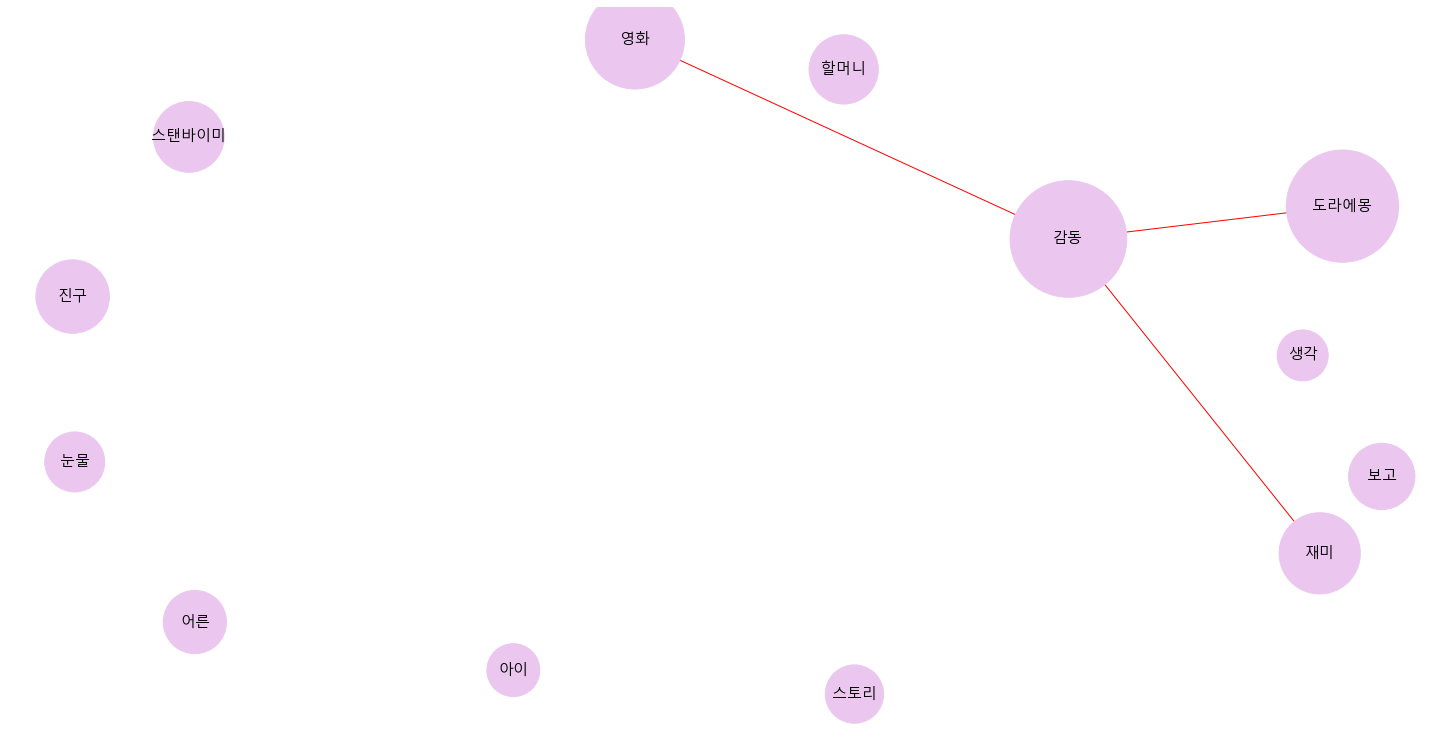

In [88]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.figure(figsize=(20,10)) 

# networkx 그래프 객체를 생성합니다.
G = nx.Graph() 

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 
# ‘노드’ 역할을 하는 원을 생성합니다.

for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])    

# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘
# 관계’ 역할을 하는 선을 생성합니다.
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
    

# 그래프 디자인과 관련된 파라미터를 설정합니다.
# https://networkx.org/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html

pos = nx.spring_layout(G, k=0.5, iterations=40)
sizes = [G.nodes[node]['nodesize']*200 for node in G]
nx.draw(G, pos=pos, node_size=sizes,with_labels=False, 
        edge_color='#FF0000',node_color = '#ebc7f0')
 

# 한글폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
fname = fm.FontProperties(fname=font_path).get_name()
nx.draw_networkx_labels(G, pos=pos, font_size=15,font_family=fname) 

# 그래프를 출력합니다.
ax = plt.gca()
plt.show()